In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


### load data

In [2]:
# demand factor

file = open('../../preprocessing/s_demand.pkl', 'rb')

s_demand = pickle.load(file)

file.close()

s_demand.describe()

count    87672.000000
mean         0.672161
std          0.092507
min          0.423928
25%          0.601167
50%          0.677592
75%          0.741519
max          1.000000
Name: NEM, dtype: float64

In [3]:
# VRE capacity factor 

file1 = open('../../preprocessing/df_VRE.pkl', 'rb')

df_VRE = pickle.load(file1)

file1.close()

df_VRE.describe()

,NSA_wind,ADE_wind,SESA_wind,NQ_wind,CQ_wind,SWQ_wind,SEQ_wind,NNS_wind,NCEN_wind,SWNSW_wind,...,SEQ_pv,NNS_pv,NCEN_pv,SWNSW_pv,CAN_pv,CVIC_pv,NVIC_pv,MEL_pv,LV_pv,TAS_pv
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,...,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,0.487176,0.518950,0.482749,0.412358,0.399124,0.371925,0.298820,0.369941,0.410580,0.430320,...,0.223738,0.230826,0.224122,0.227533,0.221578,0.220851,0.213939,0.200579,0.191443,0.184123
std,0.250937,0.311564,0.294525,0.186893,0.209994,0.216614,0.232979,0.229998,0.264962,0.256515,...,0.292910,0.300694,0.294765,0.299780,0.302242,0.298624,0.293695,0.280950,0.271458,0.273811
min,0.000170,0.000000,0.000000,0.003431,0.000033,0.000023,0.000000,0.000073,0.000015,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283203,0.239799,0.226274,0.268482,0.233753,0.195482,0.115597,0.175866,0.176217,0.215271,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.487286,0.532403,0.470042,0.412669,0.403292,0.361328,0.243690,0.352348,0.392946,0.422647,...,0.003167,0.004674,0.003822,0.004537,0.001356,0.001878,0.001367,0.001156,0.000933,0.000000
75%,0.689897,0.805126,0.736311,0.553285,0.558590,0.530006,0.435457,0.540617,0.625332,0.633184,...,0.476179,0.497844,0.476866,0.475440,0.440186,0.460181,0.428022,0.382439,0.353978,0.318978
max,0.990404,0.991690,0.991685,0.966683,0.980837,0.986573,0.991660,0.991663,0.991540,0.991620,...,0.921856,0.952050,0.945950,0.952181,0.986578,0.948800,0.957956,0.967111,0.982356,1.000000


In [4]:
# bootstrap selections
file2 = open('M_bootstrap.pkl', 'rb')

M_bootstrap = pickle.load(file2)

file2.close()

M_bootstrap.shape

(100, 17520)

In [5]:
df_cost=pd.read_csv('../../raw_data/gencost_2223_summary.csv', skiprows=1, index_col=0)
df_cost

,CAP [AUD/kW],fixed O&M [AUD/kW/yr],variable O&M [AUD/MWh],CO2 store [AUD/MWh],fuel [AUD/MWh]
technology,,,,,
onshore,1642,25.00,0.00,0.00,0.000000
solar,498,17.00,0.00,0.00,0.000000
gasCCS,3012,16.35,7.20,1.90,106.568182
coalCCS,8083,77.80,7.95,4.13,34.600000
rooftop solar,483,17.00,0.00,0.00,0.000000
grid solar,513,17.00,0.00,0.00,0.000000
biomass,7292,131.60,8.40,0.00,0.000000
hydro,5500,100.00,0.00,0.00,0.000000


In [6]:
# capacity cost per MW per year, assuming 25 years economic life

cap_wind=df_cost.iloc[0,0]*1000/25 #[AUD/MW/yr]
cap_pv=df_cost.iloc[1,0]*1000/25 #[AUD/MW/yr]
cap_gas=df_cost.iloc[2,0]*1000/25 #[AUD/MW/yr]

fOM_wind=df_cost.iloc[0,1]*1000 #[AUD/MW/yr] 
fOM_pv=df_cost.iloc[1,1]*1000 #[AUD/MW/yr] 
fOM_gas=df_cost.iloc[2,1]*1000 #[AUD/MW/yr] 



# energy cost per MWh
gvar=df_cost.iloc[2, [2,3,4]].sum() # total variable cost of gas with CCS [AUD/MWh]

# check
print('CAP wind', cap_wind)
print('O&M wind', fOM_wind)
print('CAP pv', cap_pv)
print('O&M pv', fOM_pv)
print('CAP gas', cap_gas)
print('O&M gas', fOM_gas)
print('var cost of gas', gvar)


CAP wind 65680.0
O&M wind 25000.0
CAP pv 19920.0
O&M pv 17000.0
CAP gas 120480.0
O&M gas 16350.000000000002
var cost of gas 115.66818181818199


### determine cost values on the efficient frontier

In [7]:
################
# min cost portfolio, sample 3 years
################

from scipy.optimize import linprog

_s_demand=s_demand.loc[(s_demand.index.year>=2004)& (s_demand.index.year<=2006)]
_df_VRE=df_VRE.loc[(df_VRE.index.year>=2004)& (df_VRE.index.year<=2006)]

M_p=_df_VRE.values


T=len(_s_demand) # number of hours / time steps
N_years=3

v_VREfixed=np.concatenate([np.repeat((cap_wind + fOM_wind),16) , np.repeat((cap_pv + fOM_pv),16)])
v_allfixed=np.append(v_VREfixed, cap_gas + fOM_gas)

# objective
c=np.concatenate([v_allfixed , np.repeat(gvar/N_years, T)]) # v_x =[X_i, X_g, g_t]

# equality constraint: there is none

#inequality constraints
## no demand deficit
Aub_demand=np.hstack([-M_p, np.zeros((T,1)), -np.identity(T)])
bub_demand=-(_s_demand.values)
## capacity of gas
Aub_gas=np.hstack([np.zeros((T,32)), -np.ones((T,1)),  np.identity(T)])
bub_gas=np.zeros(T)
## VRE IC
Aub_IC=np.concatenate([np.repeat(-1, 32), np.repeat(0, T+1)]).reshape(1,-1)
bub_IC=-1

Aub=np.vstack([Aub_demand, Aub_gas, Aub_IC])

bub=np.append(np.append(bub_demand, bub_gas), bub_IC)

lb=np.repeat(0, len(c))
ub=np.concatenate([np.repeat(100, 32), np.repeat(1, T+1)])
bounds=[(lb[i], ub[i]) for i in range(len(lb))]

res = linprog(c, A_ub=Aub, b_ub=bub, bounds=bounds, method='highs-ipm')

print('2004-2006')
print(res.message)

print(res.fun)

portfolio_mincost_sample=res.x[:33]
print(portfolio_mincost_sample)


2004-2006
Optimization terminated successfully. (HiGHS Status 7: Optimal)
274932.7382251944
[0.47011608 0.         0.         0.75929332 0.         0.11045319
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.20514202 0.48525458 0.
 0.         0.19569947 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.59709659]


In [8]:
res.x[:32].sum()

2.225958663878993

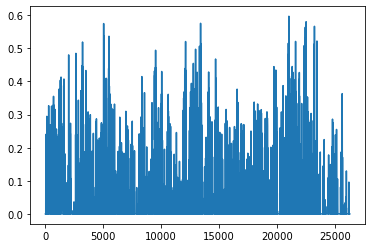

In [9]:
plt.plot(res.x[34:])
plt.show()

In [10]:
res.x[34:].max()

0.5970965940626027

In [11]:
np.array([np.cov(s_demand.values, df_VRE[col])[0,1] for col in df_VRE.columns])

array([-0.00418509, -0.00178896, -0.00028949, -0.00101158, -0.00173755,
       -0.00183957,  0.00164528, -0.00367551, -0.00380156, -0.00477207,
        0.00148371, -0.00166131, -0.00102623,  0.00036318,  0.00163806,
        0.00078705,  0.01153599,  0.01064295,  0.01046057,  0.01151853,
        0.01160642,  0.01137502,  0.0109594 ,  0.0112153 ,  0.01093153,
        0.01113282,  0.0107078 ,  0.01081024,  0.01043662,  0.00999292,
        0.00967602,  0.00936088])

In [12]:
#################
# min risk portfolio, computed from COV of full dataset
#################

P_cov=df_VRE.cov().values

Pd_cov=np.array([np.cov(s_demand, df_VRE[col])[0,1] for col in df_VRE.columns])

from qpsolvers import Problem, solve_problem
from scipy import sparse


problem_minrisk_all = Problem(P=P_cov, q=-Pd_cov, G=-np.repeat(1,32), h=np.array([-1]),  A=None, 
                          lb=np.zeros(32), ub=np.repeat(100, 32))                         
# quadprog is the best solver here
solution_minrisk_all = solve_problem(problem_minrisk_all, solver='quadprog', verbose=True)

print('optimal = ', solution_minrisk_all.is_optimal(1e-8))
print('objective =', solution_minrisk_all.obj+s_demand.var())

optimal =  True
objective = 0.010550623552810466


In [13]:
portfolio_minrisk_all=solution_minrisk_all.x
portfolio_minrisk_all

array([ 8.79758036e-02,  1.03341931e-17,  4.49361139e-19,  2.45534506e-01,
        3.39294600e-02,  1.31584476e-01,  3.29732405e-02,  4.69012301e-19,
        0.00000000e+00, -9.81290168e-18,  5.57553298e-02,  6.62149859e-19,
        2.43873045e-02, -7.84258861e-19,  2.46707061e-02,  2.96022769e-02,
        1.93348994e-02,  6.20047214e-02,  2.73343107e-19,  1.11071449e-01,
       -1.22958542e-17, -5.66744833e-17,  1.08703697e-18, -3.92583198e-18,
        1.89600423e-17,  2.26093011e-17, -7.61120705e-18, -5.33684351e-17,
       -4.54467485e-17, -4.85446456e-17,  5.84603259e-02,  8.27155016e-02])

In [14]:
portfolio_minrisk_all.sum()

0.9999999999999998

In [15]:
s_rplus_mincost=pd.Series(index=df_VRE.index, data=s_demand-df_VRE.values@portfolio_mincost_sample[:-1]).clip(lower=0)
s_rplus_minrisk=pd.Series(index=df_VRE.index, data=s_demand-df_VRE.values@portfolio_minrisk_all).clip(lower=0)

annual_cost_mincost=v_allfixed@portfolio_mincost_sample+s_rplus_mincost.sum()/10*gvar
annual_cost_minrisk=v_allfixed@np.concatenate([portfolio_minrisk_all, np.array([s_rplus_minrisk.max()])])+\
s_rplus_minrisk.sum()/10*gvar

print(annual_cost_mincost, annual_cost_minrisk)

273246.7484429451 518028.48630780366


In [ ]:
# try cost ranging from 240000 to 540000